In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For preprocessing and splitting data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# For evaluating models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# For deep learning (TensorFlow/Keras)
import tensorflow as tf
from tensorflow import keras

# xgboost
import xgboost as xgb

In [16]:
df = pd.read_csv('cleaned.csv')
ranks = pd.read_csv('ranks.csv')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14390 entries, 0 to 14389
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gameid                    14390 non-null  object 
 1   league                    14390 non-null  object 
 2   playoffs                  14390 non-null  int64  
 3   game                      14390 non-null  float64
 4   participantid             14390 non-null  int64  
 5   side                      14390 non-null  object 
 6   position                  14390 non-null  object 
 7   playername                14390 non-null  object 
 8   gamelength                14390 non-null  int64  
 9   result                    14390 non-null  int64  
 10  kills                     14390 non-null  int64  
 11  deaths                    14390 non-null  int64  
 12  assists                   14390 non-null  int64  
 13  teamkills                 14390 non-null  int64  
 14  teamde

In [18]:
X = df.drop(columns=['gameid', 'league', 'playoffs', 'game', 'participantid', 'side', 'position', 'playername', 'gamelength', 'result', 'inhibitors', 'opp_inhibitors'])
y = df['result']

In [19]:
X = X.drop(columns=[col for col in X.columns if 'team' in col])
X

,kills,deaths,assists,ckpm,damagetochampions,damageshare,damagetakenperminute,damagemitigatedperminute,wardsplaced,wardskilled,controlwardsbought,visionscore,totalgold,earned gpm,earnedgoldshare,total cs,minionkills,monsterkills
0,0,1,5,0.3316,8772.0,0.170502,682.9082,1120.3827,26.0,9.0,13.0,48.0,12631.0,192.7806,0.166407,303.0,299.0,4.0
1,0,1,3,0.3316,4741.0,0.092151,614.2092,419.8214,27.0,26.0,16.0,77.0,11736.0,169.9490,0.146700,221.0,34.0,187.0
2,3,2,2,0.3316,12344.0,0.239932,474.5918,387.2449,12.0,14.0,8.0,44.0,14988.0,252.9082,0.218307,340.0,322.0,18.0
3,3,0,1,0.3316,21995.0,0.427519,128.4184,271.1735,24.0,44.0,11.0,90.0,20150.0,384.5918,0.331971,501.0,478.0,23.0
4,0,3,4,0.3316,3596.0,0.069896,314.2857,430.0000,74.0,12.0,21.0,113.0,11278.0,158.2653,0.136615,72.0,72.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14385,2,2,4,1.0353,19039.0,0.167138,851.5491,0.0000,16.0,7.0,4.0,0.0,15061.0,218.2132,0.219371,363.0,359.0,4.0
14386,4,8,8,1.0353,14179.0,0.124473,1370.5905,0.0000,30.0,12.0,7.0,0.0,13140.0,174.0184,0.174944,173.0,33.0,140.0
14387,4,6,7,1.0353,22151.0,0.194457,510.8512,0.0000,16.0,5.0,1.0,0.0,16358.0,248.0521,0.249367,362.0,349.0,13.0
14388,5,6,7,1.0353,32714.0,0.287187,583.3206,0.0000,16.0,5.0,1.0,0.0,14532.0,206.0429,0.207137,254.0,252.0,2.0


Accuracy: 0.938498957609451
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1441
           1       0.93      0.95      0.94      1437

    accuracy                           0.94      2878
   macro avg       0.94      0.94      0.94      2878
weighted avg       0.94      0.94      0.94      2878



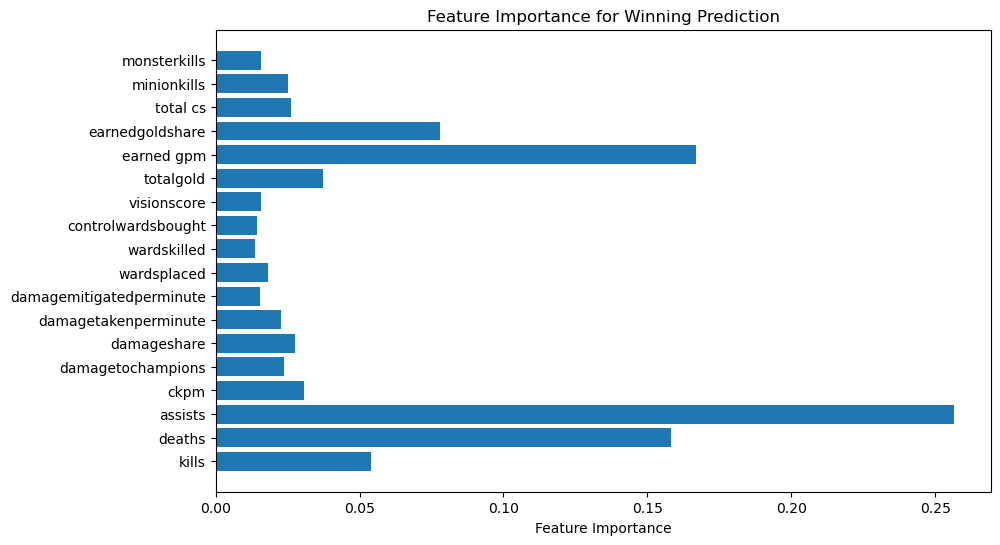

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot feature importances
feature_importances = model.feature_importances_
features = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Winning Prediction')
plt.show()

Top 10 Most Important Features:
            Feature  Importance
2           assists    0.256442
13       earned gpm    0.166864
1            deaths    0.158295
14  earnedgoldshare    0.077824
0             kills    0.054101


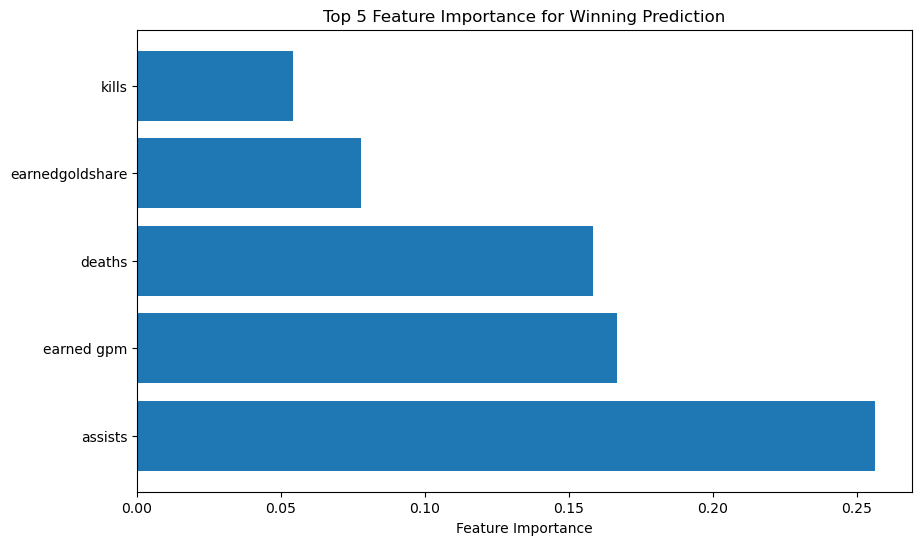

In [24]:
# Extract feature importances
feature_importances = model.feature_importances_
features = X.columns

# Create a DataFrame for easy sorting
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select top 10 features (if you have at least 10)
top_5_features = importance_df.head(5)
print("Top 10 Most Important Features:")
print(top_5_features)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'])
plt.xlabel('Feature Importance')
plt.title('Top 5 Feature Importance for Winning Prediction')
plt.show()

In [30]:
ranks = ranks[ranks['playername'].isin(df['playername'])]
ranks.reset_index(drop=True, inplace=True)
ranks['rank'] = ranks.index + 1
ranks

,playername,rank
0,Faker,1
1,Chovy,2
2,Peanut,3
3,Keria,4
4,Ruler,5
...,...,...
265,Orome,266
266,Loulex,267
267,Gilius,268
268,Nien,269


In [32]:
df = pd.merge(df, ranks, on='playername')
df

,gameid,league,playoffs,game,participantid,side,position,playername,gamelength,result,...,wardskilled,controlwardsbought,visionscore,totalgold,earned gpm,earnedgoldshare,total cs,minionkills,monsterkills,rank
0,ESPORTSTMNT01/1051679,LCK,0,1.0,1,Blue,top,Rascal,2352,1,...,9.0,13.0,48.0,12631.0,192.7806,0.166407,303.0,299.0,4.0,98
1,ESPORTSTMNT01/1051679,LCK,0,1.0,2,Blue,jng,Cuzz,2352,1,...,26.0,16.0,77.0,11736.0,169.9490,0.146700,221.0,34.0,187.0,80
2,ESPORTSTMNT01/1051679,LCK,0,1.0,3,Blue,mid,PawN,2352,1,...,14.0,8.0,44.0,14988.0,252.9082,0.218307,340.0,322.0,18.0,53
3,ESPORTSTMNT01/1051679,LCK,0,1.0,4,Blue,bot,Deft,2352,1,...,44.0,11.0,90.0,20150.0,384.5918,0.331971,501.0,478.0,23.0,14
4,ESPORTSTMNT01/1051679,LCK,0,1.0,5,Blue,sup,TusiN,2352,1,...,12.0,21.0,113.0,11278.0,158.2653,0.136615,72.0,72.0,0.0,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14385,TRNA1/1001320165,IEM,0,2.0,6,Red,top,Flame,2608,0,...,7.0,4.0,0.0,15061.0,218.2132,0.219371,363.0,359.0,4.0,150
14386,TRNA1/1001320165,IEM,0,2.0,7,Red,jng,Dardoch,2608,0,...,12.0,7.0,0.0,13140.0,174.0184,0.174944,173.0,33.0,140.0,205
14387,TRNA1/1001320165,IEM,0,2.0,8,Red,mid,Pobelter,2608,0,...,5.0,1.0,0.0,16358.0,248.0521,0.249367,362.0,349.0,13.0,154
14388,TRNA1/1001320165,IEM,0,2.0,9,Red,bot,Cody Sun,2608,0,...,5.0,1.0,0.0,14532.0,206.0429,0.207137,254.0,252.0,2.0,176


In [25]:
features = ['kills', 'earnedgoldshare', 'deaths', 'earned gpm', 'assists']

In [42]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split

# Features (using only the top 5 most important features)
X = df[features]

# Target: Player's Rank
y = df['rank']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize XGBoost model for ranking (learning-to-rank)
model = xgb.XGBRanker(objective='rank:pairwise', eval_metric='ndcg')

# Prepare ranking data (grouping by GameID)
train_group = X_train.groupby(df.loc[X_train.index, 'gameid']).size().tolist()
test_group = X_test.groupby(df.loc[X_test.index, 'gameid']).size().tolist()

# Train the model
model.fit(X_train, y_train, group=train_group)

# Predict rankings for the test set
y_pred = model.predict(X_test)

# Create a DataFrame to map predicted ranks to players
df_pred = X_test.copy()
df_pred['Predicted_Score'] = y_pred
df_pred['PlayerName'] = df.loc[X_test.index, 'playername']  # Replace 'playername' with the actual player name column

# Sort by predicted score to get the rank order (descending)
df_pred = df_pred.sort_values(by='Predicted_Score', ascending=False)

# Assign ranks based on the sorted order
df_pred['Predicted_Rank'] = range(1, len(df_pred) + 1)

# Display player names along with their predicted ranks and scores
print(df_pred[['PlayerName', 'Predicted_Score', 'Predicted_Rank']])

      PlayerName  Predicted_Score  Predicted_Rank
13074    GorillA         1.299993               1
12657   Bjergsen         1.294531               2
10553        Ohq         1.224394               3
1984       TusiN         1.076071               4
10879    GorillA         0.924969               5
...          ...              ...             ...
1703      Sneaky        -1.148019            2874
3919      Kaiser        -1.354170            2875
1453      Aiming        -1.409866            2876
2310     Breathe        -1.417338            2877
708        Ruler        -1.435546            2878

[2878 rows x 3 columns]
